In [1]:
# Life_Expectancy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Unnamed: 0,Year,Income share held by lowest 20%,GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Gross capital formation (% of GDP),"Revenue, excluding grants (% of GDP)",Time required to start a business (days),Domestic credit provided by financial sector (% of GDP),High-technology exports (% of manufactured exports),"External debt stocks, total (DOD, current US$)","Foreign direct investment, net inflows (BoP, current US$)","Population, total",CO2 emissions (metric tons per capita),"Life expectancy at birth, total (years)"
0,0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45138458,0.075471,36.976
1,1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46063563,0.089319,37.431
2,2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47029822,0.088888,37.871
3,3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48032934,0.111385,38.291
4,4,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49066760,0.148274,38.691


In [5]:
test.head()

,Unnamed: 0,Year,Income share held by lowest 20%,GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)","Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Gross capital formation (% of GDP),"Revenue, excluding grants (% of GDP)",Time required to start a business (days),Domestic credit provided by financial sector (% of GDP),High-technology exports (% of manufactured exports),"External debt stocks, total (DOD, current US$)","Foreign direct investment, net inflows (BoP, current US$)","Population, total",CO2 emissions (metric tons per capita)
0,0,1990,..,5.403580e+10,11.776886,6.668942,21.556263,35.410327,20.97477285,9.949967231,53.18668521,..,..,..,..,33458483418,587882970.6,95212450,0.411675
1,1,1991,..,4.911843e+10,0.358353,18.863907,20.885283,36.965566,24.24686728,12.77473759,48.40571698,..,..,..,..,33526931287,712373362.5,97667632,0.432827
2,2,1992,4,4.779493e+10,4.631193,46.752355,20.321159,37.709608,23.9747503,14.25263801,43.77938896,..,..,..,..,29018663728,896641282.5,100161710,0.465396
3,3,1993,..,2.775220e+10,-2.035119,41.639059,23.491130,33.174342,20.06653995,13.65321498,44.48885975,..,..,..,..,30699263746,1345368587,102700753,0.439501
4,4,1994,..,3.383304e+10,-1.814924,43.296464,25.173849,31.318390,13.54924651,9.509989939,42.08362086,..,..,..,..,33092276818,1959219858,105293700,0.334299


In [6]:
train.shape

(30, 20)

In [7]:
test.shape

(30, 19)

In [8]:
train.isnull().sum()

Unnamed: 0                                                     0
Year                                                           0
Income share held by lowest 20%                               29
GDP (current US$)                                             10
GDP growth (annual %)                                         10
Inflation, GDP deflator (annual %)                            10
Agriculture, forestry, and fishing, value added (% of GDP)    21
Industry (including construction), value added (% of GDP)     21
Exports of goods and services (% of GDP)                      10
Imports of goods and services (% of GDP)                      10
Gross capital formation (% of GDP)                            21
Revenue, excluding grants (% of GDP)                          30
Time required to start a business (days)                      30
Domestic credit provided by financial sector (% of GDP)       30
High-technology exports (% of manufactured exports)           30
External debt stocks, tot

In [9]:
train.isnull().sum()/ len(train)

Unnamed: 0                                                    0.000000
Year                                                          0.000000
Income share held by lowest 20%                               0.966667
GDP (current US$)                                             0.333333
GDP growth (annual %)                                         0.333333
Inflation, GDP deflator (annual %)                            0.333333
Agriculture, forestry, and fishing, value added (% of GDP)    0.700000
Industry (including construction), value added (% of GDP)     0.700000
Exports of goods and services (% of GDP)                      0.333333
Imports of goods and services (% of GDP)                      0.333333
Gross capital formation (% of GDP)                            0.700000
Revenue, excluding grants (% of GDP)                          1.000000
Time required to start a business (days)                      1.000000
Domestic credit provided by financial sector (% of GDP)       1.000000
High-t

In [10]:
columns = train.columns

In [11]:
columns[2]

'Income share held by lowest 20%'

In [12]:
train.drop([columns[2], columns[7], columns[6], columns[10], columns[11], columns[12], columns[13], columns[14]], inplace= True, axis=1)

In [13]:
train.isnull().sum()

Unnamed: 0                                                    0
Year                                                          0
GDP (current US$)                                            10
GDP growth (annual %)                                        10
Inflation, GDP deflator (annual %)                           10
Exports of goods and services (% of GDP)                     10
Imports of goods and services (% of GDP)                     10
External debt stocks, total (DOD, current US$)               10
Foreign direct investment, net inflows (BoP, current US$)    10
Population, total                                             0
CO2 emissions (metric tons per capita)                        0
Life expectancy at birth, total (years)                       0
dtype: int64

In [14]:
train.describe(include='all')

,Unnamed: 0,Year,GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Foreign direct investment, net inflows (BoP, current US$)","Population, total",CO2 emissions (metric tons per capita),"Life expectancy at birth, total (years)"
count,30.000000,30.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,3.000000e+01,30.000000,30.000000
mean,14.500000,1974.500000,5.374134e+10,3.032891,26.569550,14.762922,12.529795,1.107122e+10,3.768050e+08,6.517091e+07,0.565865,42.571733
std,8.803408,8.803408,4.131759e+10,8.864266,47.094811,7.879052,7.293537,1.047892e+10,4.464165e+08,1.467450e+07,0.322211,3.125062
min,0.000000,1960.000000,9.181770e+09,-13.127880,1.348034,5.249090,3.029761,8.366806e+08,-7.388700e+08,4.513846e+07,0.075471,36.976000
25%,7.250000,1967.250000,2.704586e+10,-2.143654,6.609243,8.079512,6.428624,1.756027e+09,2.454833e+08,5.263322e+07,0.237324,39.902750
50%,14.500000,1974.500000,4.563149e+10,3.784547,14.133965,12.008402,11.504521,7.591396e+09,3.517173e+08,6.252574e+07,0.701654,42.958000
75%,21.750000,1981.750000,6.652243e+10,6.903080,21.008042,20.868486,19.095735,1.800133e+10,4.479157e+08,7.693078e+07,0.844405,45.809500
max,29.000000,1989.000000,1.644750e+11,25.007242,219.002844,29.375174,23.922283,3.012199e+10,1.884250e+09,9.278803e+07,1.009958,46.127000


In [15]:
columns = train.columns

In [16]:
train[columns[2]].mean()

53741342698.55

In [17]:
for i in columns:
    train[i].fillna(train[i].median(), inplace=True)

In [18]:
train.isnull().sum()

Unnamed: 0                                                   0
Year                                                         0
GDP (current US$)                                            0
GDP growth (annual %)                                        0
Inflation, GDP deflator (annual %)                           0
Exports of goods and services (% of GDP)                     0
Imports of goods and services (% of GDP)                     0
External debt stocks, total (DOD, current US$)               0
Foreign direct investment, net inflows (BoP, current US$)    0
Population, total                                            0
CO2 emissions (metric tons per capita)                       0
Life expectancy at birth, total (years)                      0
dtype: int64

In [19]:
test.isnull().sum()

Unnamed: 0                                                    0
Year                                                          0
Income share held by lowest 20%                               0
GDP (current US$)                                             0
GDP growth (annual %)                                         0
Inflation, GDP deflator (annual %)                            0
Agriculture, forestry, and fishing, value added (% of GDP)    0
Industry (including construction), value added (% of GDP)     0
Exports of goods and services (% of GDP)                      0
Imports of goods and services (% of GDP)                      0
Gross capital formation (% of GDP)                            0
Revenue, excluding grants (% of GDP)                          0
Time required to start a business (days)                      0
Domestic credit provided by financial sector (% of GDP)       0
High-technology exports (% of manufactured exports)           0
External debt stocks, total (DOD, curren

In [20]:
column = test.columns

In [21]:
test.drop([column[2], column[7], column[6], column[10], column[11], column[12], column[13], column[14]], inplace=True, axis=1)

In [22]:
test.isnull().sum()

Unnamed: 0                                                   0
Year                                                         0
GDP (current US$)                                            0
GDP growth (annual %)                                        0
Inflation, GDP deflator (annual %)                           0
Exports of goods and services (% of GDP)                     0
Imports of goods and services (% of GDP)                     0
External debt stocks, total (DOD, current US$)               0
Foreign direct investment, net inflows (BoP, current US$)    0
Population, total                                            0
CO2 emissions (metric tons per capita)                       3
dtype: int64

In [23]:
test.shape

(30, 11)

In [24]:
column = test.columns

In [25]:
test[column[10]].fillna(0.565865,inplace=True)

In [26]:
test.isnull().sum()

Unnamed: 0                                                   0
Year                                                         0
GDP (current US$)                                            0
GDP growth (annual %)                                        0
Inflation, GDP deflator (annual %)                           0
Exports of goods and services (% of GDP)                     0
Imports of goods and services (% of GDP)                     0
External debt stocks, total (DOD, current US$)               0
Foreign direct investment, net inflows (BoP, current US$)    0
Population, total                                            0
CO2 emissions (metric tons per capita)                       0
dtype: int64

In [27]:
for i in train.columns:
    print(train[i].dtype)

int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
float64
float64


In [28]:
column = train.columns

In [29]:
train[columns[-3]] = train[columns[-3]].astype(float)

In [30]:
for i in train.columns:
    print(train[i].dtype)

int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [31]:
test.describe(include='all')

,Unnamed: 0,Year,GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Foreign direct investment, net inflows (BoP, current US$)","Population, total",CO2 emissions (metric tons per capita)
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30,30,30,30,3.000000e+01,30.000000
unique,NaN,NaN,NaN,NaN,NaN,30,30,30,30,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,31.54658773,17.66014555,34094439060,8195499253,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN
mean,14.500000,2004.500000,2.236948e+11,4.546357,17.296883,NaN,NaN,NaN,NaN,1.412014e+08,0.574819
std,8.803408,8.803408,1.801917e+11,3.986615,16.110485,NaN,NaN,NaN,NaN,3.205242e+07,0.160605
min,0.000000,1990.000000,2.775220e+10,-2.035119,0.686099,NaN,NaN,NaN,NaN,9.521245e+07,0.312014
25%,7.250000,1997.250000,5.449439e+10,1.994175,7.305145,NaN,NaN,NaN,NaN,1.141732e+08,0.434495
50%,14.500000,2004.500000,1.562600e+11,4.823564,10.306632,NaN,NaN,NaN,NaN,1.370927e+08,0.639385
75%,21.750000,2011.750000,3.925562e+11,6.651284,22.053519,NaN,NaN,NaN,NaN,1.661228e+08,0.718044


In [32]:
columns = test.columns

In [33]:
test = test.replace('..', 13.45)

In [34]:
test[columns[-3]] = test[columns[-3]].astype('float')
test[columns[-4]] = test[columns[-4]].astype('float')
test[columns[-5]] = test[columns[-5]].astype('float')
test[columns[-6]] = test[columns[-6]].astype('float')

In [35]:
for i in test.columns:
    print(test[i].dtype)

int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
float64


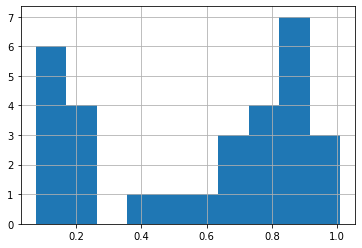

In [36]:
train[columns[-1]].hist()

In [37]:
train[columns[-1]].skew()

-0.3662320294538902

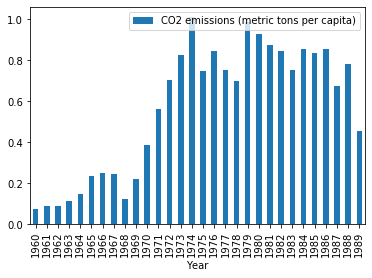

In [38]:
p=pd.pivot_table(data=train,index=column[1],values=columns[-1],aggfunc=np.median)
p.plot(kind='bar')

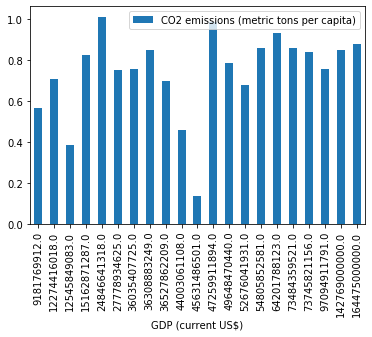

In [39]:
p=pd.pivot_table(data=train,index=column[2],values=columns[-1],aggfunc=np.median)
p.plot(kind='bar')

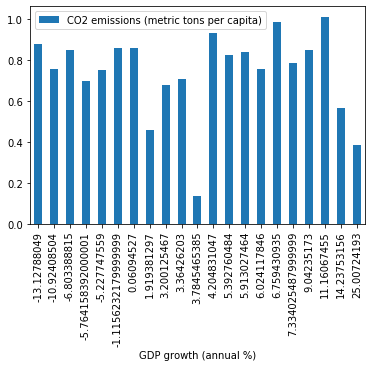

In [40]:
p=pd.pivot_table(data=train,index=column[3],values=columns[-1],aggfunc=np.median)
p.plot(kind='bar')

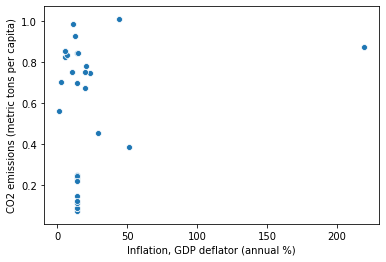

In [41]:
sns.scatterplot(data=train, y=columns[-1], x=columns[4])

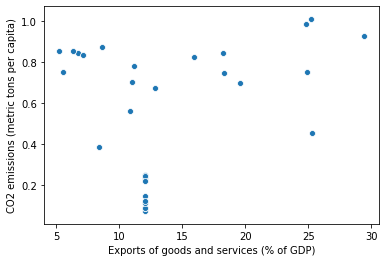

In [42]:
sns.scatterplot(data=train, x=columns[5], y=columns[-1])

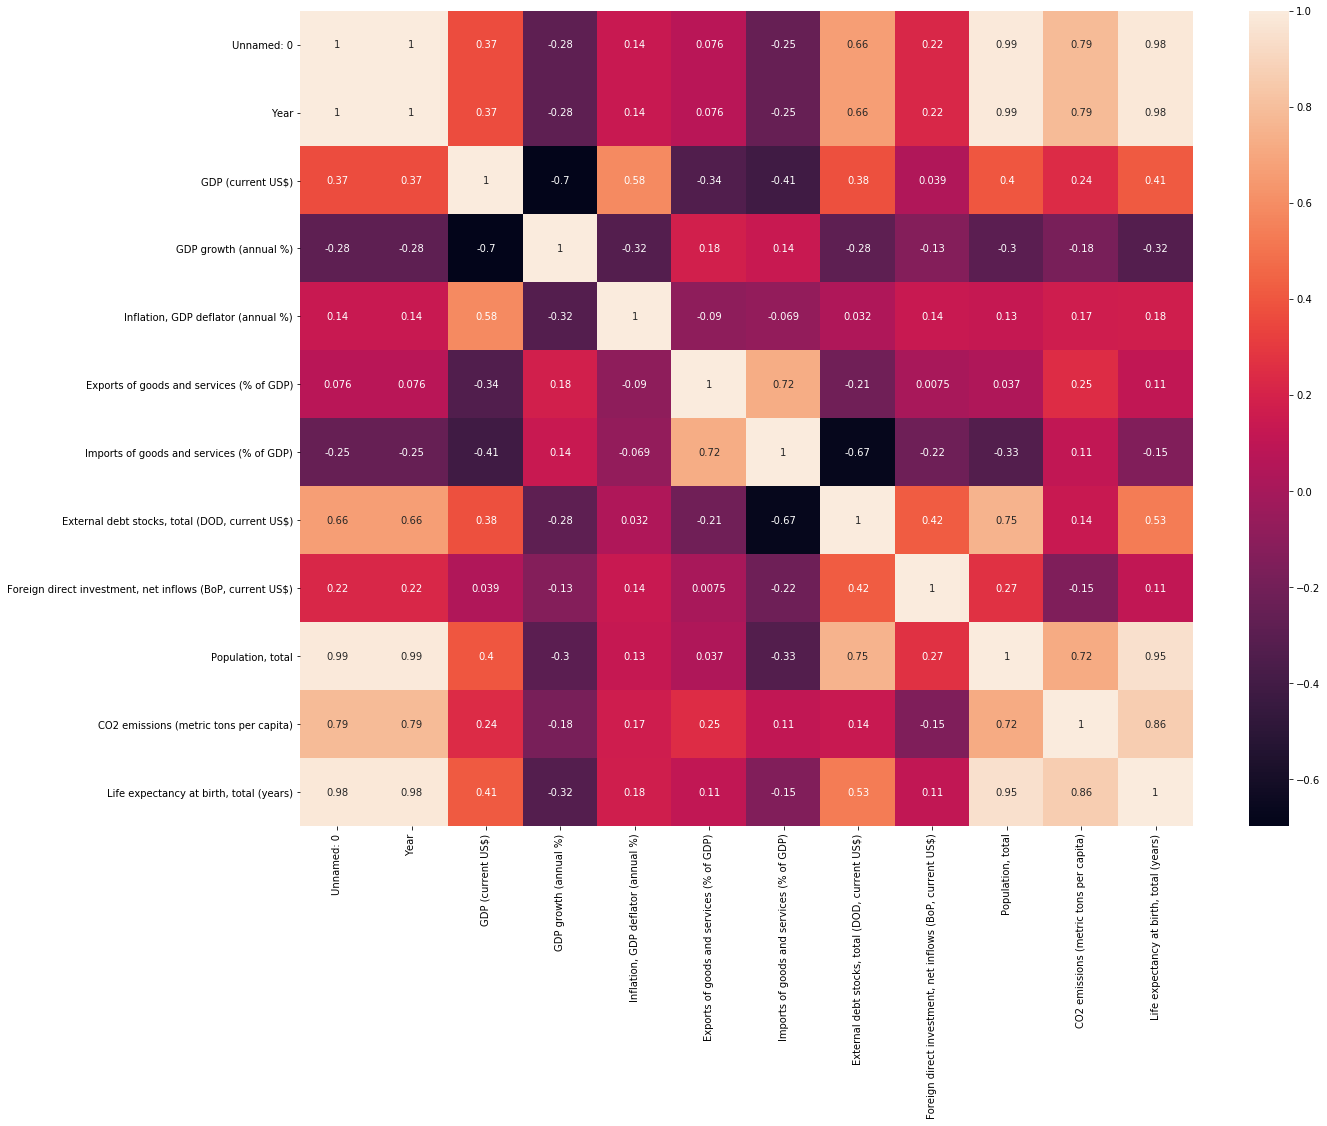

In [43]:
plt.figure(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True)

In [44]:
Y = train['Life expectancy at birth, total (years)']
X = train.drop('Life expectancy at birth, total (years)',axis=1)

In [45]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=2)
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=2)
val = abr.fit(train_X,train_Y)
accuracy = abr.score(test_X, test_Y)
accuracy

0.9802398359242513

In [46]:
prediction = abr.predict(test)

In [47]:
prediction

array([45.333     , 45.333     , 45.333     , 44.2812    , 44.2812    ,
       44.2812    , 44.3255    , 44.104     , 44.104     , 45.333     ,
       45.333     , 44.25166667, 44.3255    , 44.25166667, 45.891     ,
       45.97066667, 45.91575   , 45.853     , 45.891     , 45.891     ,
       45.9645    , 45.891     , 45.99175   , 45.99175   , 46.0016    ,
       46.0016    , 46.0016    , 45.99      , 45.9645    , 45.9682    ])

In [48]:
submission = pd.DataFrame(test['Year'])
submission['Life_Expectancy'] = prediction

In [49]:
submission.to_csv('subExpectancy.csv',index=False)

In [50]:
test['Year']

0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
24    2014
25    2015
26    2016
27    2017
28    2018
29    2019
Name: Year, dtype: int64

In [51]:
submission

,Year,Life_Expectancy
0,1990,45.333000
1,1991,45.333000
2,1992,45.333000
3,1993,44.281200
4,1994,44.281200
5,1995,44.281200
6,1996,44.325500
7,1997,44.104000
8,1998,44.104000
9,1999,45.333000


In [52]:
sub= pd.read_csv('sample_submission.csv')

In [53]:
sub

,Year,Life_Expectancy
0,1990,20.03
1,1991,20.03
2,1992,20.03
3,1993,20.03
4,1994,20.03
5,1995,20.03
6,1996,20.03
7,1997,20.03
8,1998,20.03
9,1999,20.03
